# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [83]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [84]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [85]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### Datos previamente procesados

In [86]:
preprocessed_penguins_df = palmerpenguins.load_penguins()
preprocessed_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Utilizando los conjuntos de datos de `seaborn`

In [87]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de `VS Code`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [88]:
raw_dataset_url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv"
df_raw = pd.read_csv(raw_dataset_url)
df_raw.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [89]:
raw_processed_url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
df_processed = pd.read_csv(raw_processed_url)
df_processed.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Colecta y validación de datos

La validación de datos es el proceso para asegurar la consistencia y la precisión de los datos.  Si los datos no son precisos desde el principio entonces los resultados tampoco lo serán.

##### ¿Que se debe validar para asegurar la consistencia de los datos?
- Modelo de datos
- Seguimiento del formato estándar de los datos
- Tipos de datos
- Rango de variables
- Unicidad
- Consistencia de expresiones
- Valores nulos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [90]:
preprocessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [91]:
(
    preprocessed_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

En una tabla las variables son las columnas y las observaciones son las filas.

In [92]:
preprocessed_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [93]:
(
    preprocessed_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [94]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [95]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

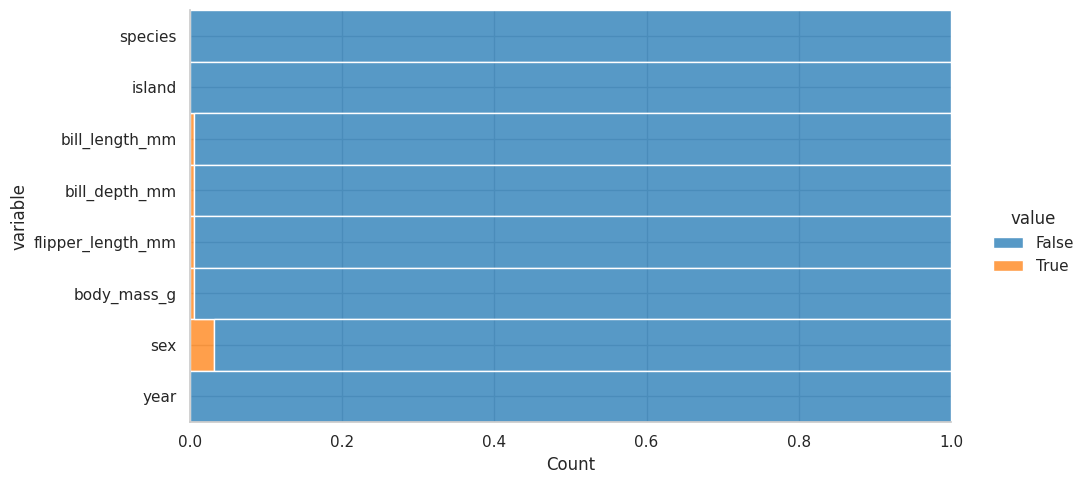

In [96]:
(
    (
    preprocessed_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data = df,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect=2
            )
        )
    )
)
)

Explicación del código anterior

##### Verificación de valores nulos
La primera operación aplicada al DataFrame es preprocessed_penguins_df.isnull(). Esto devuelve un DataFrame con la misma forma que preprocessed_penguins_df, donde cada celda contiene un valor booleano que indica si es nulo o no. Este paso ayuda a identificar los valores faltantes en el conjunto de datos.

#####  Modificar la forma del DataFrame
Se aplica la función .melt() al DataFrame booleano obtenido en el paso anterior. Esta operación modifica la forma del DataFrame de un formato amplio a un formato largo, convirtiendo efectivamente cada columna del DataFrame original en una fila. El DataFrame resultante tendrá tres columnas: 'variable', 'value' y 'NaN.

##### Visualización de datos con Seaborn
El código luego utiliza el método pipe(), el cual permite encadenar múltiples operaciones juntas. Dentro de pipe(), el código define una función lambda anónima que toma el DataFrame modificado como argumento.

Dentro de la función lambda, se llama a sns.displot() para crear una visualización utilizando Seaborn. Esta función crea un gráfico de distribución (histograma o estimación de densidad de kernel) basado en los datos proporcionados. Los argumentos pasados a sns.displot() son los siguientes:

data: El DataFrame que se utilizará para la visualización, que en este caso es el DataFrame modificado.
y: Especifica la columna en el DataFrame que se utilizará como eje y del gráfico. Aquí, se establece como 'variable', que representa los nombres originales de las columnas del DataFrame preprocesado.
hue: Determina cómo diferenciar los datos. Aquí, se establece como 'value', que corresponde a si los valores originales eran nulos (NaN) o no.
multiple: Define cómo manejar múltiples observaciones en el mismo intervalo. 'fill' llena los intervalos con varios colores, representando la proporción de valores nulos y no nulos.
aspect: Establece la relación de aspecto del gráfico. Aquí, se establece en 2, lo que significa que el gráfico será el doble de ancho que de alto.

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

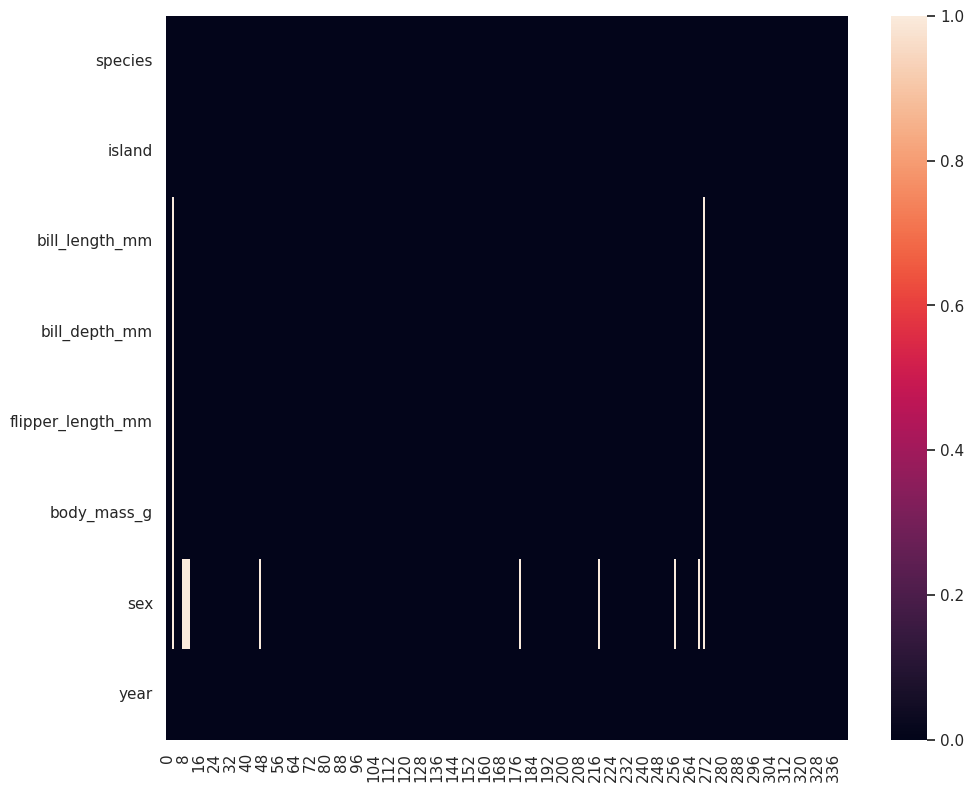

In [97]:
(
    preprocessed_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data = df
        )
    )
)
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [98]:
preprocessed_penguins_df.shape

(344, 8)

In [99]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [100]:
datos_faltantes = preprocessed_penguins_df.shape[0] - processed_penguins_df.shape[0]
datos_faltantes

11

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

La tabulación contabiliza la frecuencia de aparición de cada valor único de una variable.

### Todas las variables

In [101]:
processed_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [102]:
processed_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [103]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [104]:
(
    processed_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

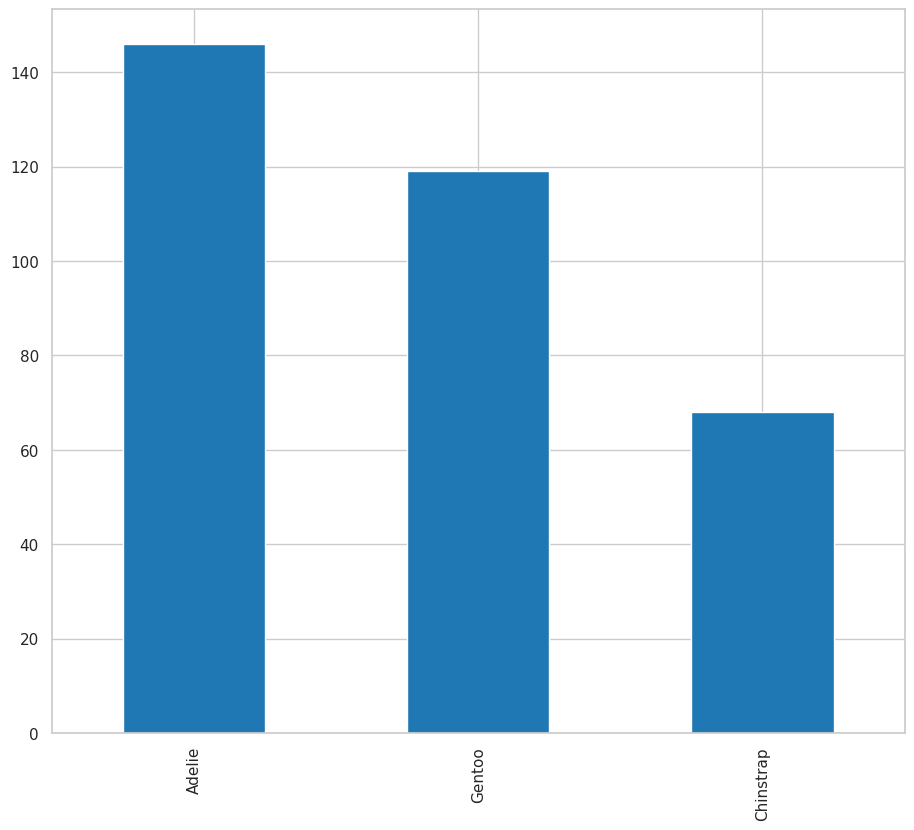

In [105]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

### Seaborn

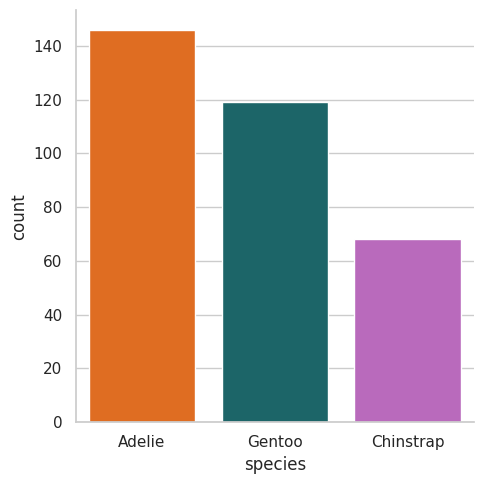

In [106]:
(
    sns.catplot(
        data = processed_penguins_df,
        x = 'species',
        kind='count',
        palette=penguin_color
    )
)

<AxesSubplot: xlabel='species', ylabel='count'>

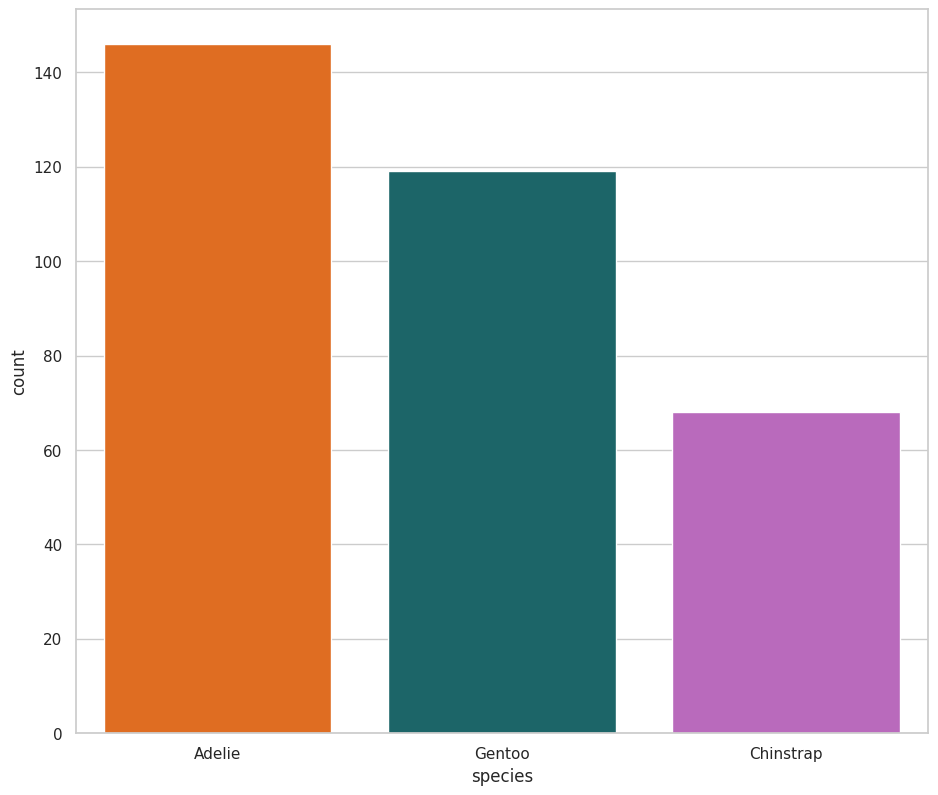

In [107]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df : (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
        )
    )
)
)

### ¿Cómo visualizar las proporciones?

La proporción es la relación de correspondencia entre las parte y el todo.

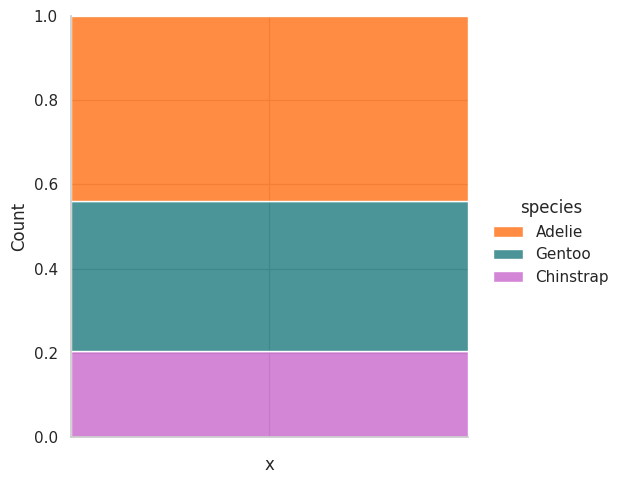

In [108]:
(
    processed_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color)
        )
    )
)

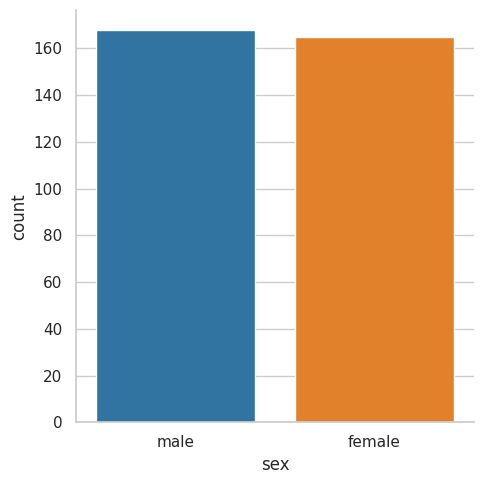

In [109]:
(
    sns.catplot(
        data = processed_penguins_df,
        x = 'sex',
        kind='count'
    )
)

<AxesSubplot: xlabel='sex', ylabel='count'>

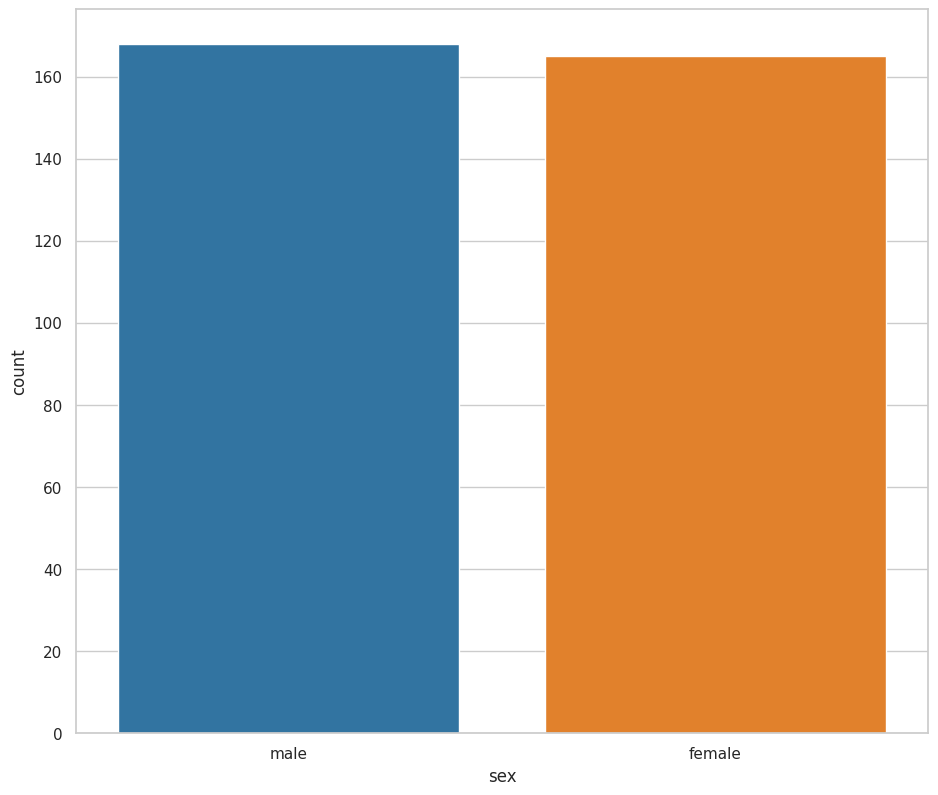

In [110]:
(
    processed_penguins_df
    .value_counts('sex', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df : (
            sns.barplot(
                data=df,
                x='sex',
                y='count'
        )
    )
)
)

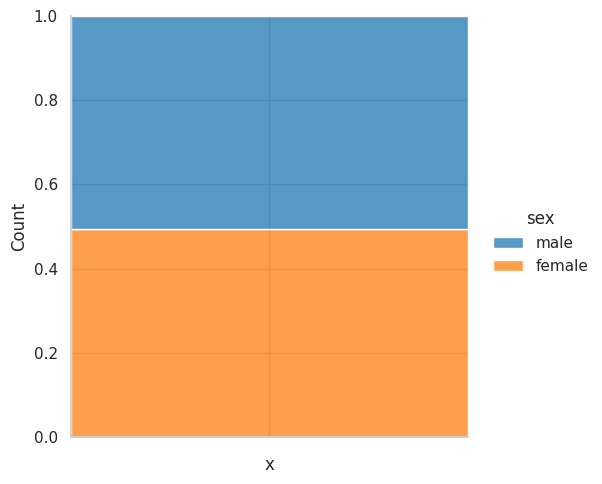

In [111]:
(
    processed_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='sex',
                multiple='fill')
        )
    )
)

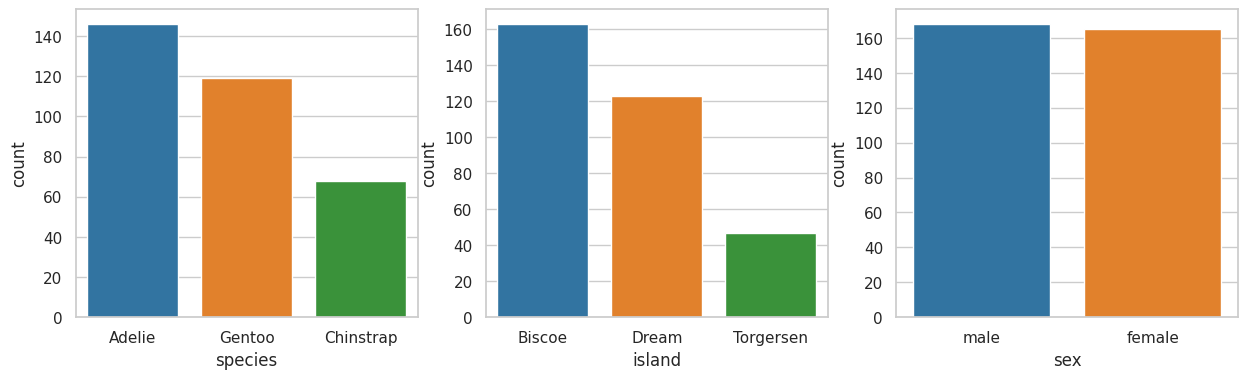

In [112]:
# Crea las graficas para las diferentes categorías

category_cols = processed_penguins_df.astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    }).select_dtypes('category').columns

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i in range(len(category_cols)):
    (
        processed_penguins_df
        .value_counts(category_cols[i], sort=True)
        .reset_index(name='count')
        .pipe(
            lambda df: (
                sns.barplot(
                    ax=ax[i],
                    data=df,
                    x=category_cols[i],
                    y='count'
                )
            )
        )
    )



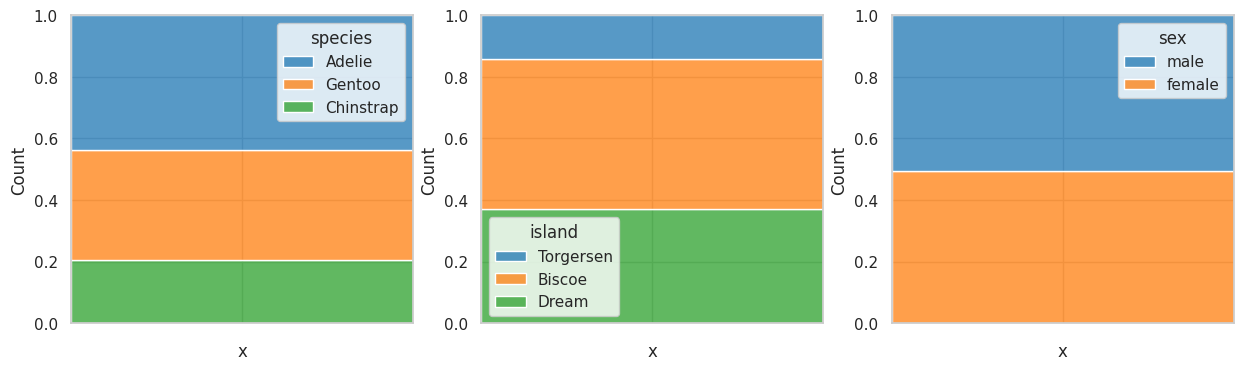

In [113]:
category_cols = processed_penguins_df.astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    }).select_dtypes('category').columns

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i in range(len(category_cols)):
        (
            processed_penguins_df
            .add_column('x', '')
            .pipe(
                lambda df: (
                    sns.histplot(
                        ax=ax[i],
                        data=df,
                        x='x',
                        hue=category_cols[i],
                        multiple='fill')
                )
            )
        )

# Medidas de tendencia central

## Media o promedio

In [114]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [115]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [116]:
processed_penguins_df.mean()

/tmp/ipykernel_497/1618060137.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana (dato central)

In [117]:
processed_penguins_df.median()

/tmp/ipykernel_497/3242987746.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [118]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [119]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


#### Otras medidas de tendencia central:

- _Media ponderada_:  Es un tipo de promedio que tiene en cuenta el peso o la importancia de cada valor en el conjunto de datos. Se calcula multiplicando cada valor por su peso, sumando estos productos y dividiendo por la suma total de los pesos. Se utiliza para reflejar la influencia relativa de diferentes elementos dentro del conjunto de datos.

- _Media armónica_:  Es una forma de promediar un conjunto de números al tomar los inversos de esos números, promediarlos y luego tomar el inverso del resultado final. Se utiliza cuando se desea dar más importancia a los valores más pequeños dentro del conjunto.

- _Media geomérica_: Es una forma de promediar un conjunto de números al multiplicarlos entre sí y luego tomar la raíz enésima del producto. Se enfoca en el crecimiento exponencial y da más importancia a los valores más grandes dentro del conjunto.


# Medidas de dispersión

- _Rango_: Es la diferencia entre el valor máximo y el valor mínimo en un conjunto de datos.

- _Rango intercuartílico_: Comprenden $\pm$ 25% de los datos respecto a la mediana.

- _Desviación estándar_: Ofrece la dispersión media de una variable.

La regla del 65, 95, 97 dice que si tomamos la media y le agregamos el rango de una desviación estándar tendremos el 65% de los datos, si tomamos los valores de 2 desviaciones entonces tendremos el 95% y si tenemos 3 desvaciones estándar entonces tendremos el 97% de los datos.

### Asimetría estadística

- Sesgo negativo (hacia la derecha): media < mediana < moda

- Simetríca: media = mediana = moda

- Sesgo positivo (hacia la izquierda): media > mediana > moda

#### Curtosis

La curtosis es una medida que nos dice qué tan "apuntados" o "aplanados" están los datos alrededor de la media. Básicamente, nos ayuda a entender si hay valores atípicos o si los datos están más concentrados o dispersos en comparación con una distribución normal.

Si los datos tienen una curtosis alta, significa que la distribución tiene picos más pronunciados y colas más pesadas. Esto indica que hay más valores concentrados alrededor de la media y posiblemente valores atípicos lejos de la media.

Por otro lado, si los datos tienen una curtosis baja, significa que la distribución es más aplanada y difusa. Esto indica que los valores están más dispersos alrededor de la media y hay menos valores atípicos.

La curtosis es una herramienta útil para comprender la forma y la variabilidad de un conjunto de datos. Nos ayuda a obtener una idea de la distribución de los datos y a detectar posibles anomalías o características particulares en ellos.

Si la curtosis vale 0 significa que los datos están _distribuidos homogéneamente_ alrededor de la media. Se dirá que la distribución es _mesocúrtica_.

Si la curtosis es positiva, significa que los datos están _concetrados alrededor de la media_. Se dirá que la distribución es _leptocúrtica_.

Si la curtosis es negativa, significa que los datos están _distribuidos a lo largo de la media_. Se dirá que la distribución es _platicúrtica_.

## ¿Cuál es el valor máximo de las variables?

In [120]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [121]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [122]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [123]:
processed_penguins_df.std()

/tmp/ipykernel_497/4261057176.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [124]:
processed_penguins_df.mean()

/tmp/ipykernel_497/1618060137.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

In [125]:
processed_penguins_df.mean() + processed_penguins_df.std()

/tmp/ipykernel_497/1334777921.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean() + processed_penguins_df.std()
/tmp/ipykernel_497/1334777921.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean() + processed_penguins_df.std()


bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
year                 2008.854986
dtype: float64

In [126]:
processed_penguins_df.mean() - processed_penguins_df.std()

/tmp/ipykernel_497/1336703272.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean() - processed_penguins_df.std()
/tmp/ipykernel_497/1336703272.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean() - processed_penguins_df.std()


bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

Podemos ver entonces que entre 38 y 46 encontramos el 65% de los datos suponiendo que nuestras variables siguen una distribución normal.

## ¿Cuál es el rango intercuartílico?

In [127]:
processed_penguins_df.quantile(0.75)

/tmp/ipykernel_497/3609120765.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75)


bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [128]:
processed_penguins_df.quantile(0.25)

/tmp/ipykernel_497/2653252021.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.25)


bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

Calculamos el rango intercuartilico al restar el cuartil .75 el .25
Con el rango intercuartilico obtenemos el 50% de los datos alrededor de la media.

In [129]:
rango_intercuartilico = processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)
rango_intercuartilico

/tmp/ipykernel_497/2590984418.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rango_intercuartilico = processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [130]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

/tmp/ipykernel_497/724629359.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

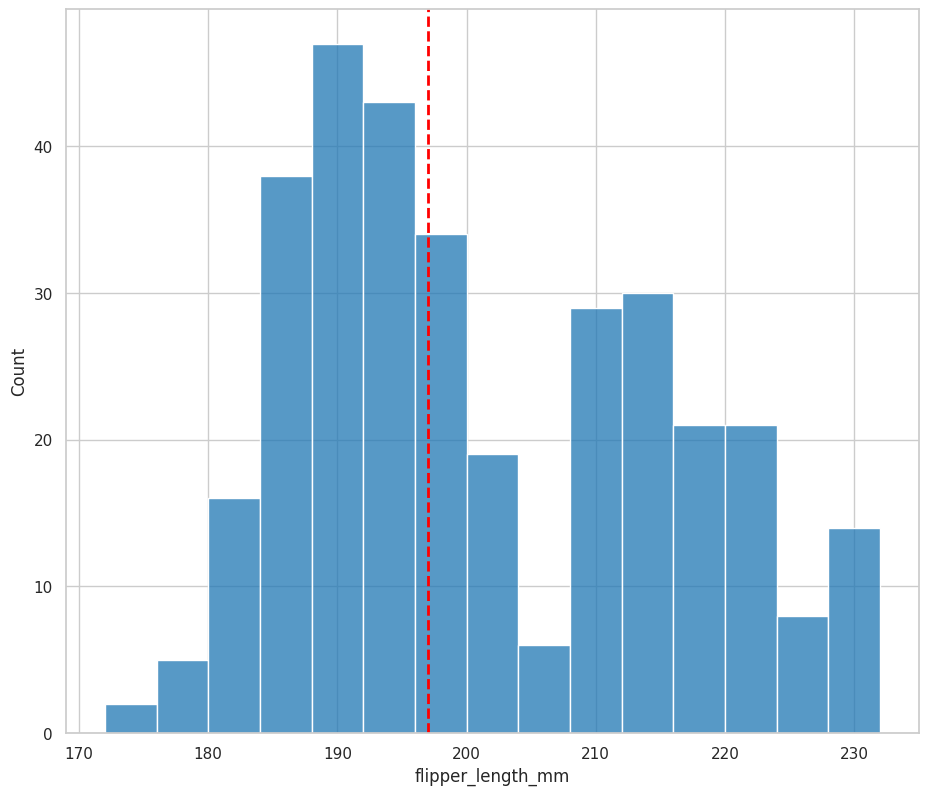

In [131]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='red',
    linestyle='dashed',
    linewidth='2'
)

### Diagrama de caja / boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

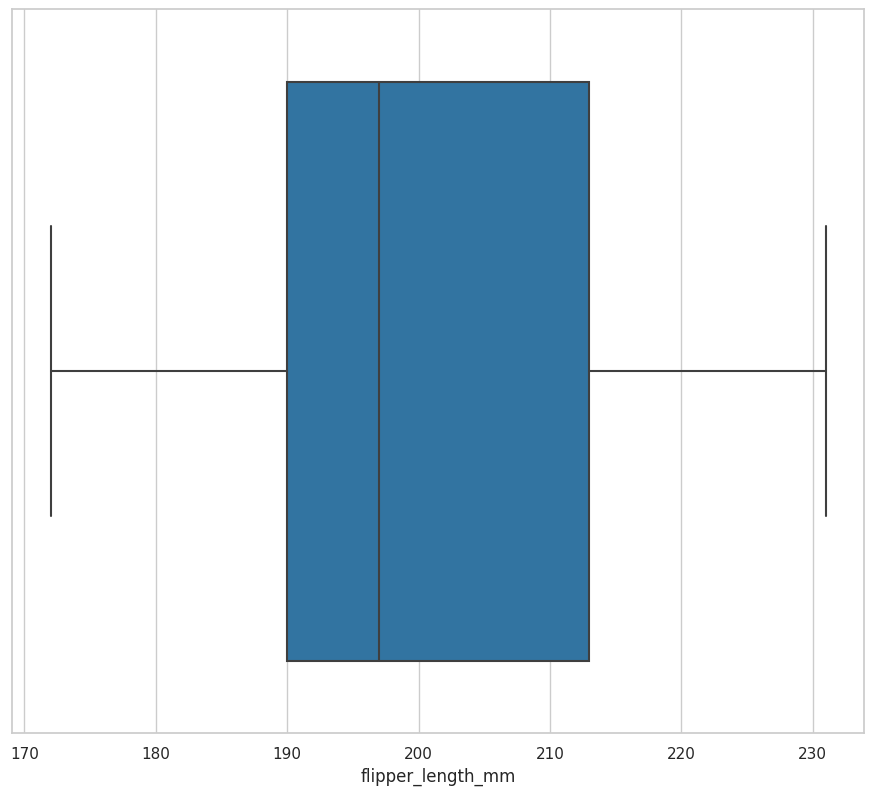

In [132]:
sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

### Limitaciones

La funcion Freedman-Diaconis permite estimar la cantidad optima de bandwidth para cada variable

In [133]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

In [134]:
s = freedman_diaconis_bindwidth(processed_penguins_df)
s

/tmp/ipykernel_497/3266041095.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = x.quantile(0.75) - x.quantile(0.25)


bill_length_mm         1.312885
bill_depth_mm          0.447246
flipper_length_mm      3.318280
body_mass_g          176.734504
year                   0.288546
dtype: float64

Text(202, 43, 'mean')

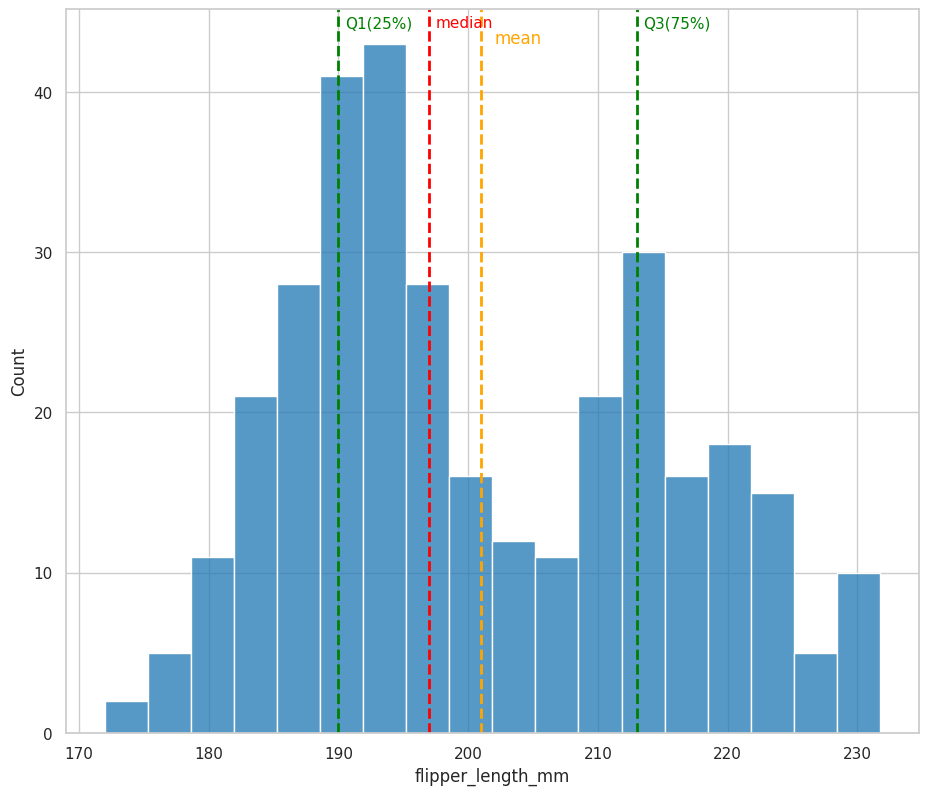

In [135]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=3.3182
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='red',
    linestyle='dashed',
    linewidth='2'
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='green',
    linestyle='dashed',
    linewidth='2'
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='green',
    linestyle='dashed',
    linewidth='2'
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='orange',
    linestyle='dashed',
    linewidth='2'
)

plt.text(197.5,44, 'median', fontsize=11, color='r')
plt.text(190.5,44, 'Q1(25%)', fontsize=11, color='g')
plt.text(213.5,44, 'Q3(75%)', fontsize=11, color='g')
plt.text(202,43, 'mean', fontsize=12, color='orange')

### Distribución bimodal
Las distribuciones bimodales por lo general se da cuando los datos vienen de diferentes fuentes

#### Métodos para visualizar una distribución:
- Histograma
- Función de probabilidad de masas (PMF).
- Función de probabilidad acumulada (CDF).
- Función de probabilidad de densidad (PDF).

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

Nos dice la probabilidad de que una variable aleatoria _discreta_ tome un valor determinado.

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

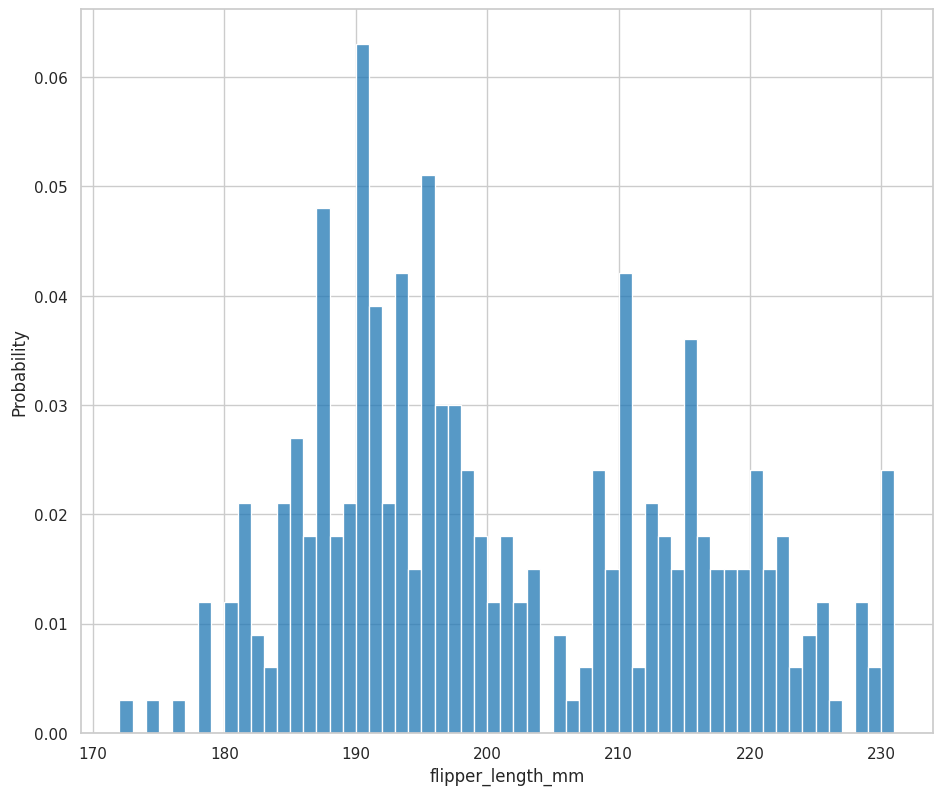

In [136]:
sns.histplot (
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

### Utilizando `empiricaldist`

In [137]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)
pmf_flipper_length_mm

,probs
172.0,0.003003
174.0,0.003003
176.0,0.003003
178.0,0.012012
180.0,0.012012
181.0,0.021021
182.0,0.009009
183.0,0.006006
184.0,0.021021
185.0,0.027027


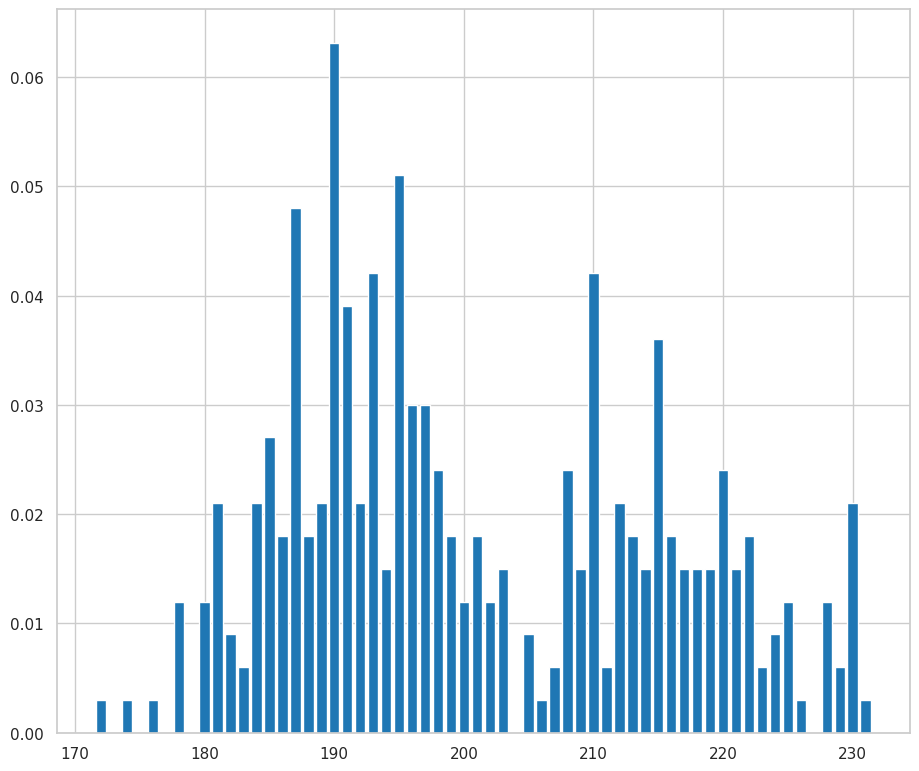

In [138]:
pmf_flipper_length_mm.bar()

In [139]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [140]:
processed_penguins_df.flipper_length_mm.max()

231.0

Al comparar los PMF generados por empiricaldist con el creado por seaborn vemos que el de seaborn no muestra el valor maximo de 231.  Esto es por la forma en la que seaborn calcula los bins.  Puede ser una desventaja ya que esta colapsando los valores en los bordes, pero no es mucho por lo que preocuparse.  En todo caso si queremos obtener info de un valor preciso, siempre podemos usar empiricaldist.

## Funciones empirícas de probabilidad acumulada (ECDFs)

La función de distribución de probabilidad devuelve la probabilidad de que una variable sea igual o menor que un valor determinado.

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

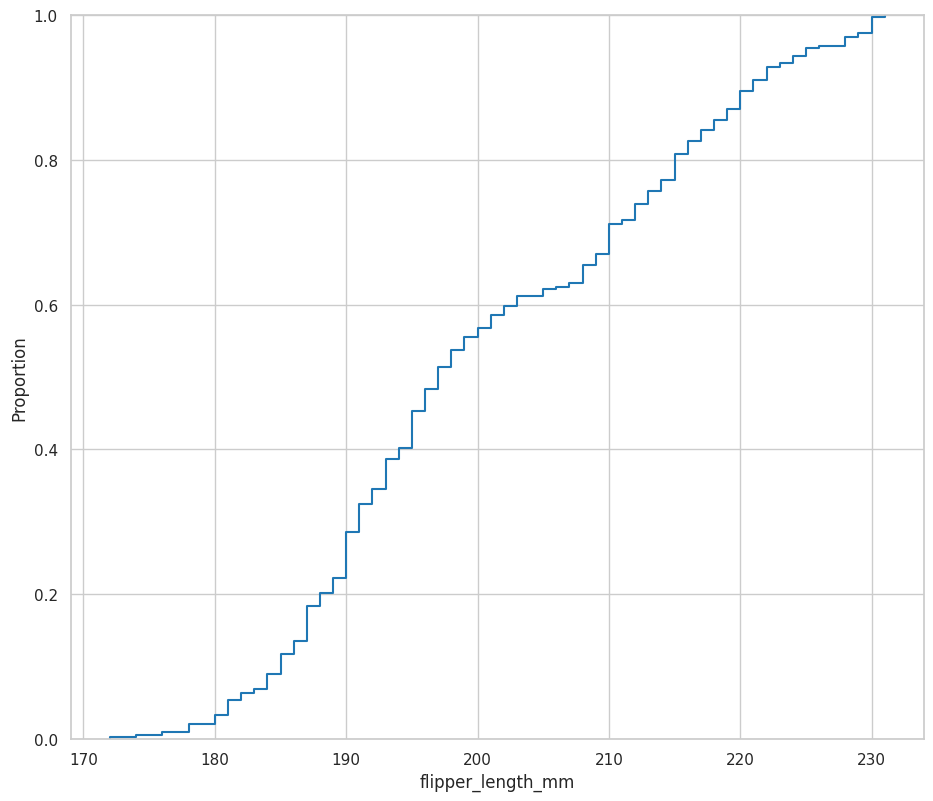

In [141]:
sns.ecdfplot(
    data = processed_penguins_df,
    x='flipper_length_mm'
)

### Utilizando `empiricaldist`

In [142]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

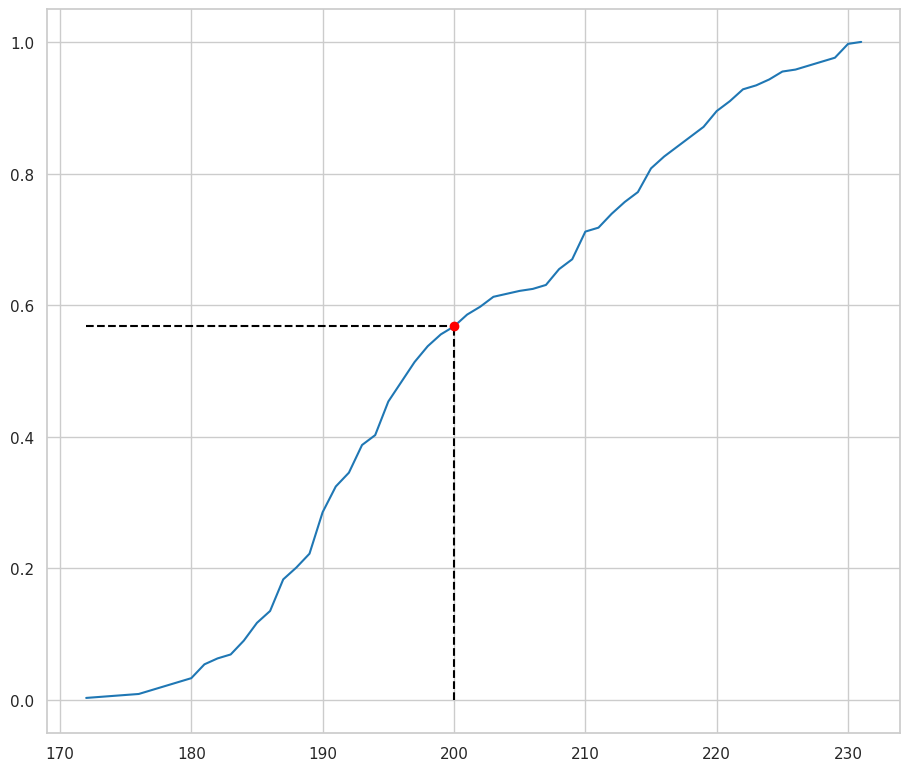

In [143]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q, p, 'ro')

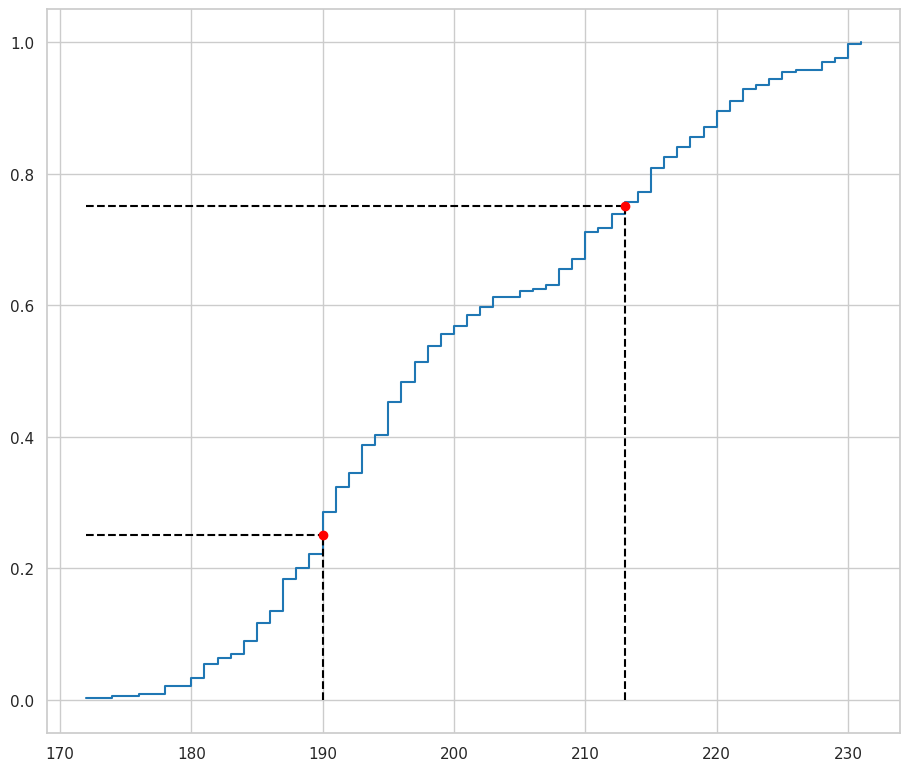

In [144]:
cdf_flipper_length_mm.step ( )
p_1 = 8.25 # Specify probability
P_2 = 8.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

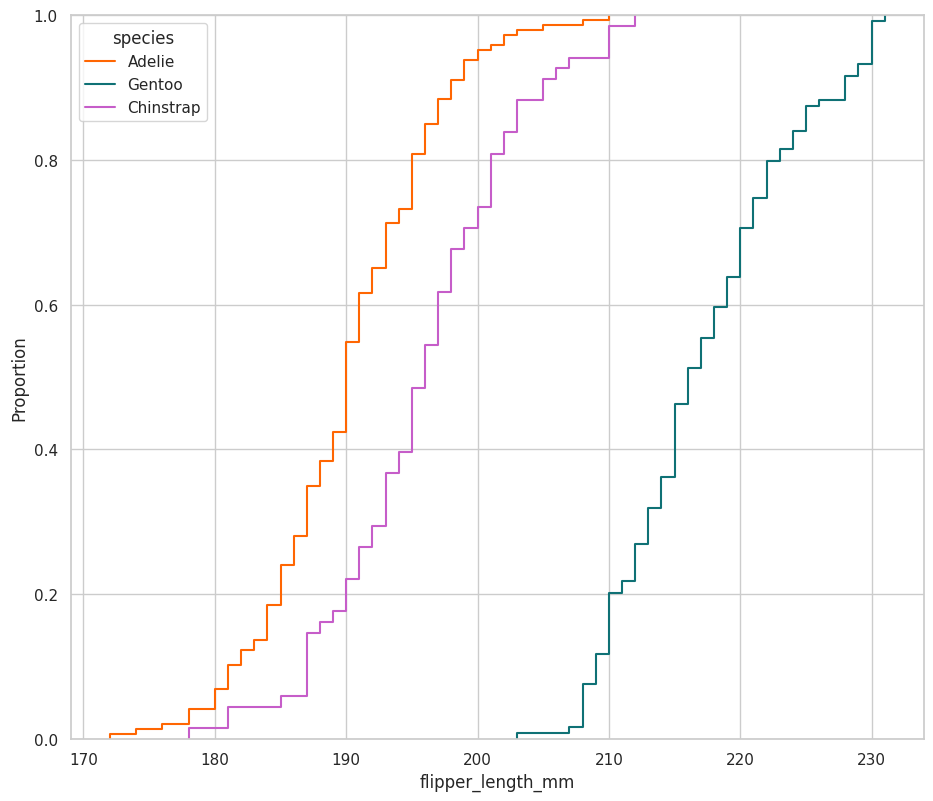

In [145]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad

Determina la probabilidad de que una _variable_ continua tome un valor determinado.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

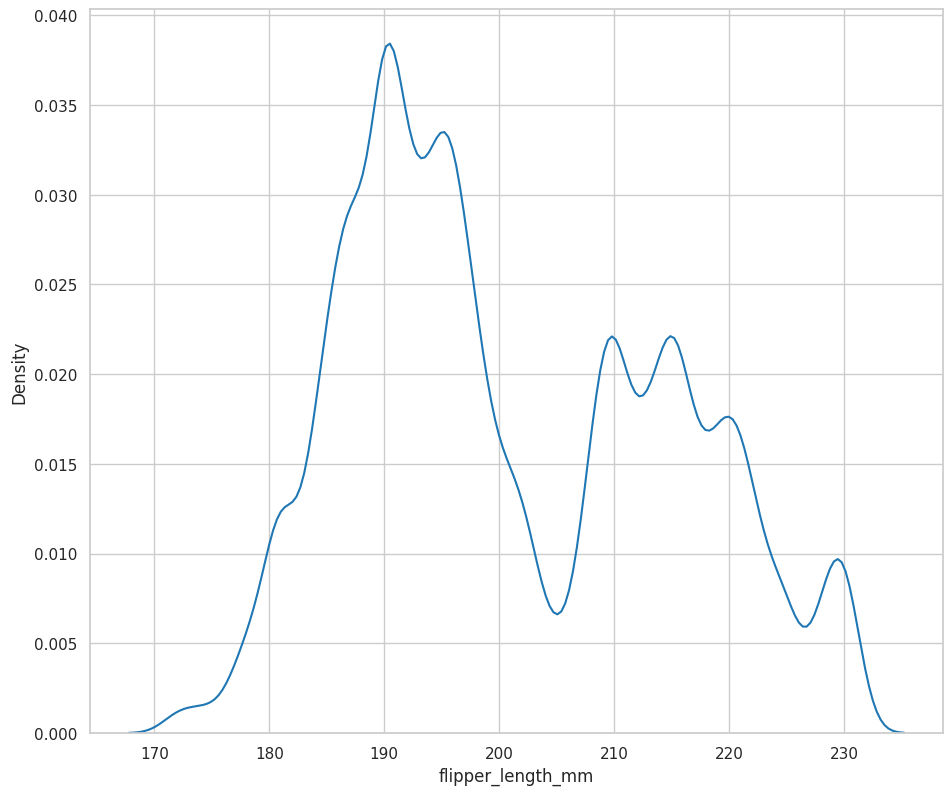

In [146]:
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1
)

In [147]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot: >

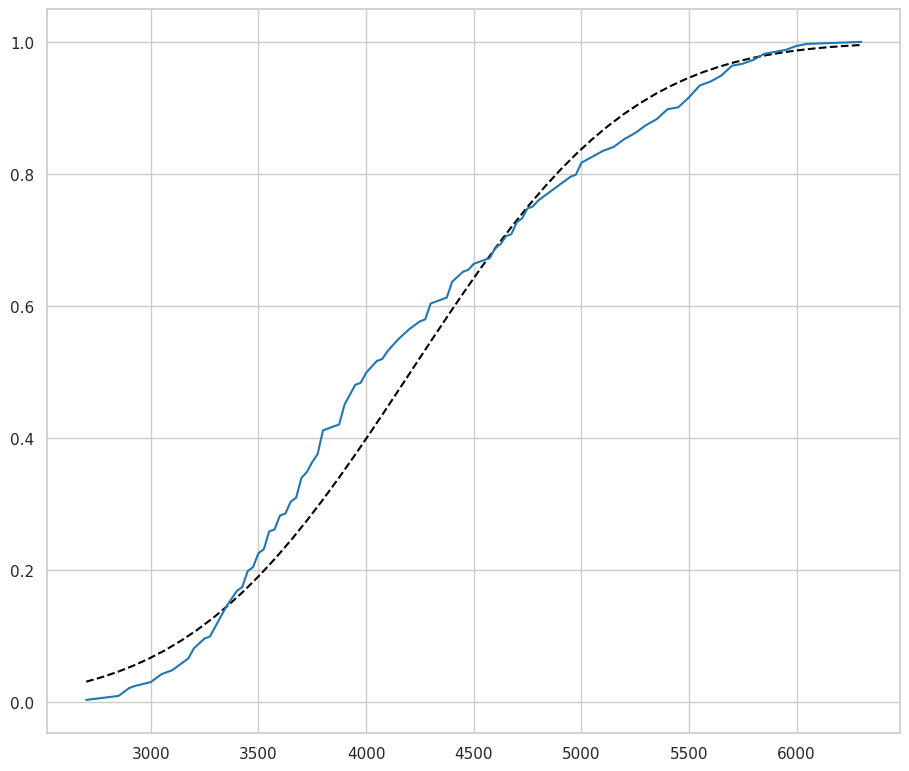

In [148]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

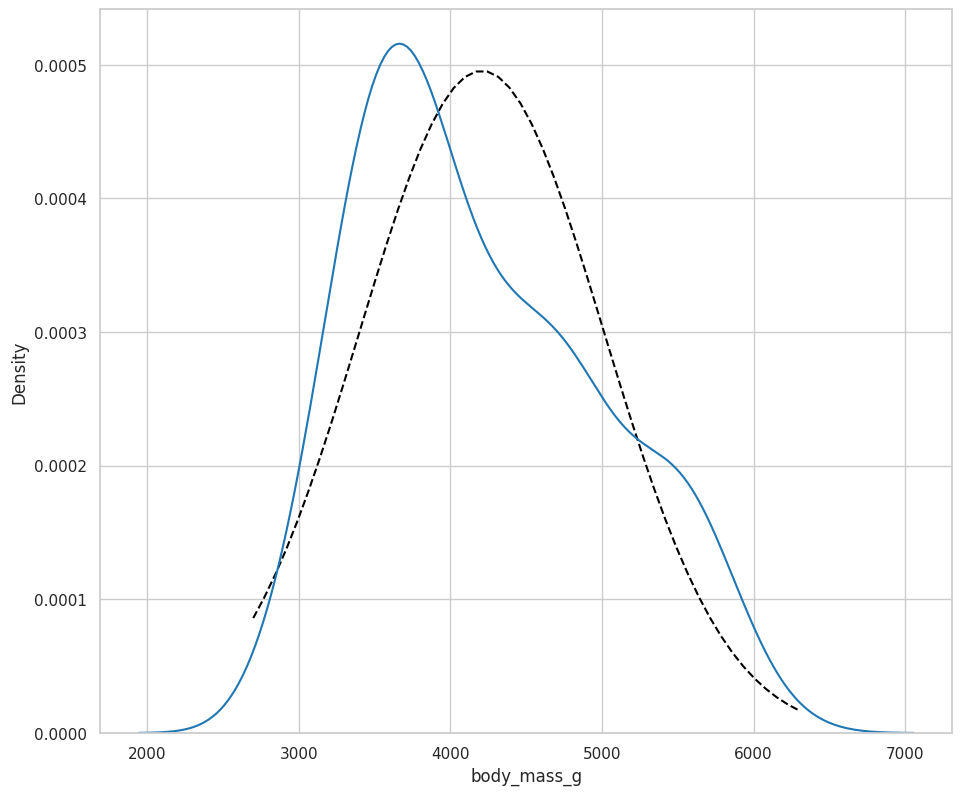

In [149]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

<AxesSubplot: xlabel='bill_length_mm', ylabel='Density'>

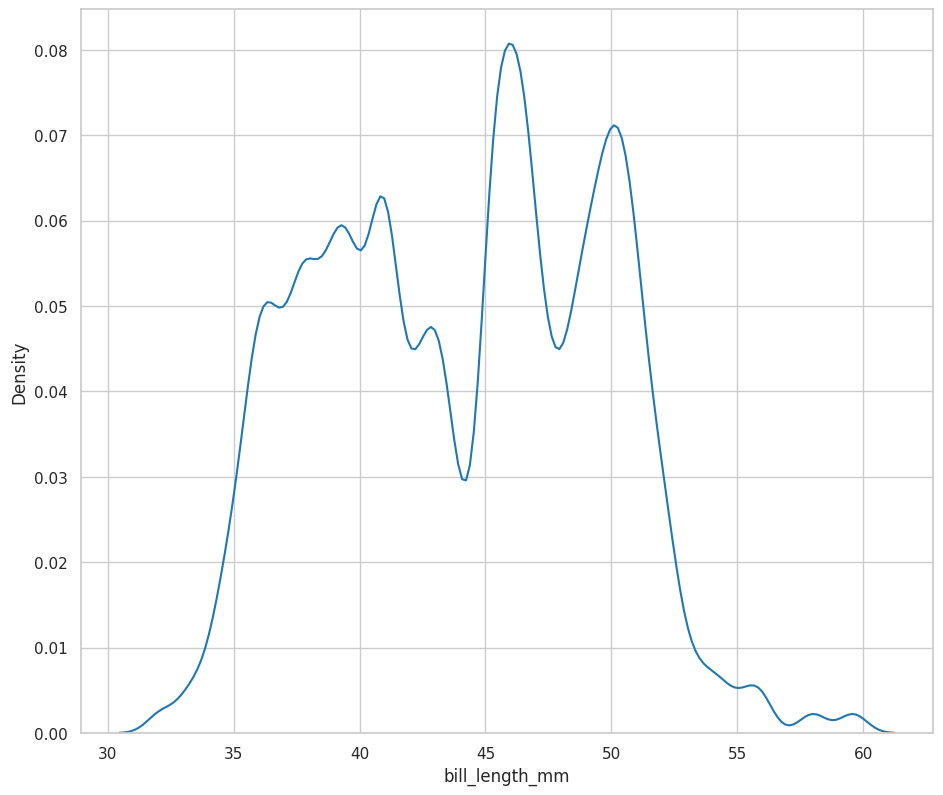

In [170]:
sns.kdeplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    bw_method=0.1
)

In [172]:
stats = processed_penguins_df.bill_length_mm.describe()

<AxesSubplot: >

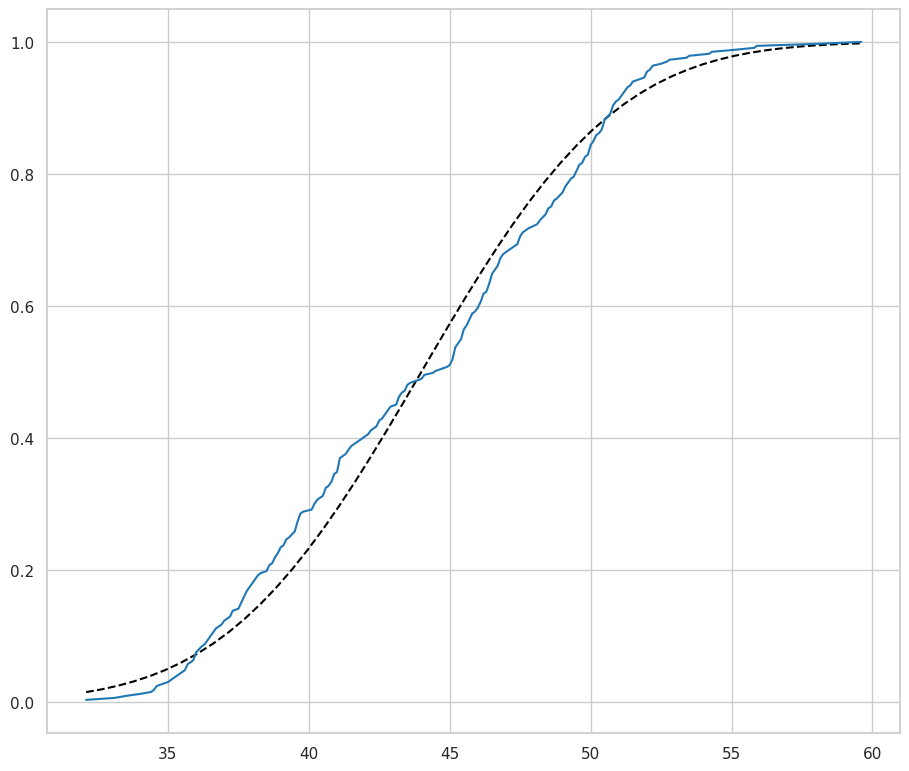

In [173]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.bill_length_mm,
    normalize=True
).plot()

<AxesSubplot: xlabel='bill_length_mm', ylabel='Density'>

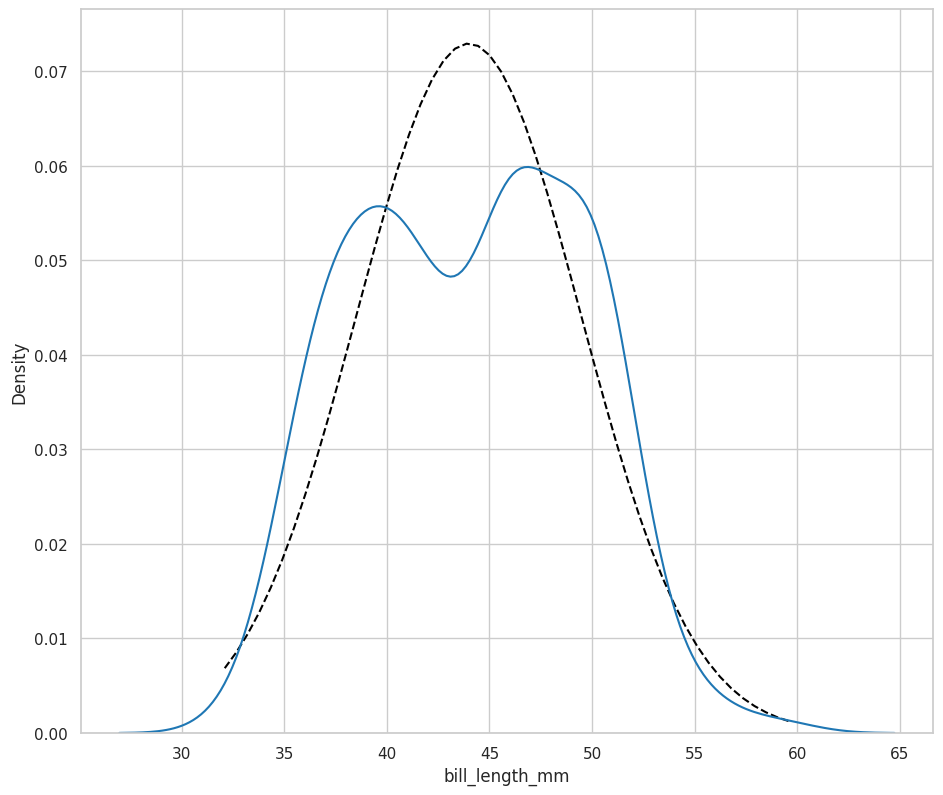

In [174]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='bill_length_mm'
)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

La ley de los grandes números es un concepto en la teoría de la probabilidad que establece que, a medida que se realizan más experimentos o se aumenta el tamaño de la muestra, los resultados observados se acercarán más a la probabilidad teórica esperada.

En términos sencillos, la ley de los grandes números dice que si repites un experimento un gran número de veces, la frecuencia con la que ocurre un determinado resultado se acercará cada vez más a la probabilidad esperada de que ese resultado ocurra.

Por ejemplo, considera un dado justo de seis caras. La probabilidad teórica de obtener cualquier número del 1 al 6 es de 1/6, ya que todas las caras son igualmente probables. Si lanzas el dado solo una vez, es posible que obtengas un número diferente al esperado, por ejemplo, un 3. Sin embargo, si lanzas el dado muchas veces, como 1000 veces, y registras los resultados, verás que la frecuencia con la que obtienes un 3 se acerca a 1/6. Cuantas más veces lances el dado, más se acercará la proporción de resultados al valor teórico de 1/6.

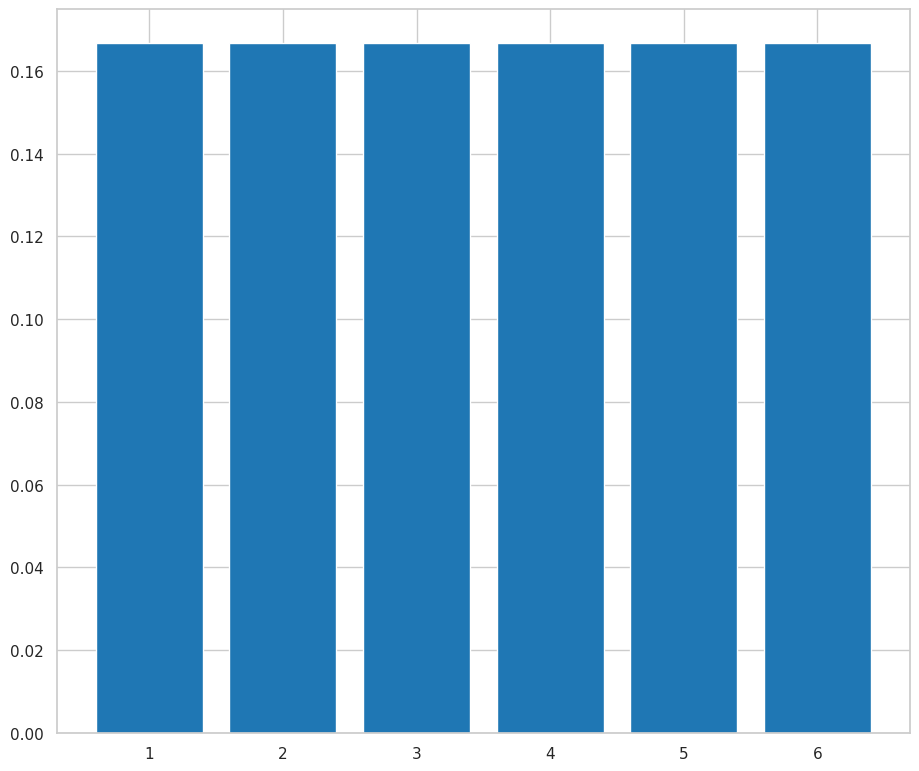

In [150]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

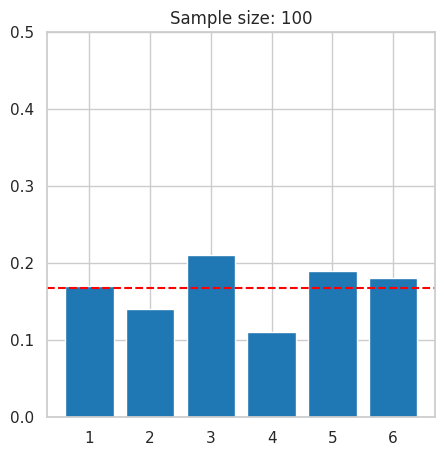

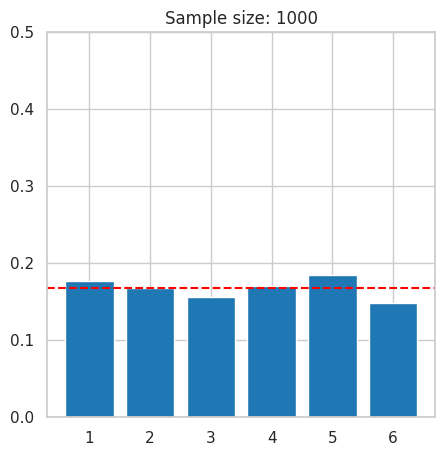

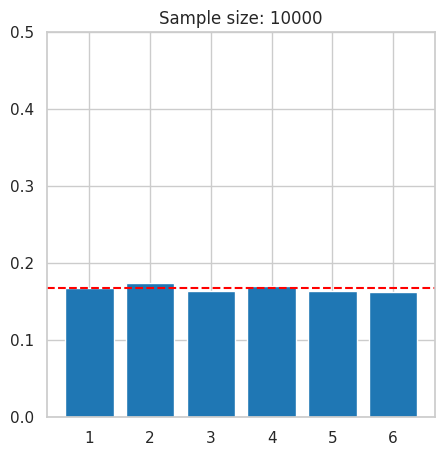

In [151]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f"Sample size: {sample_size}")

## Teorema del Límite Central

El teorema del límite central dice que cuando sumas o promedias muchos datos aleatorios, su distribución se parece a una campana llamada distribución normal, independientemente de cómo sean las distribuciones individuales de los datos. Esto es útil para entender y analizar grandes conjuntos de datos y hacer predicciones estadísticas

<AxesSubplot: >

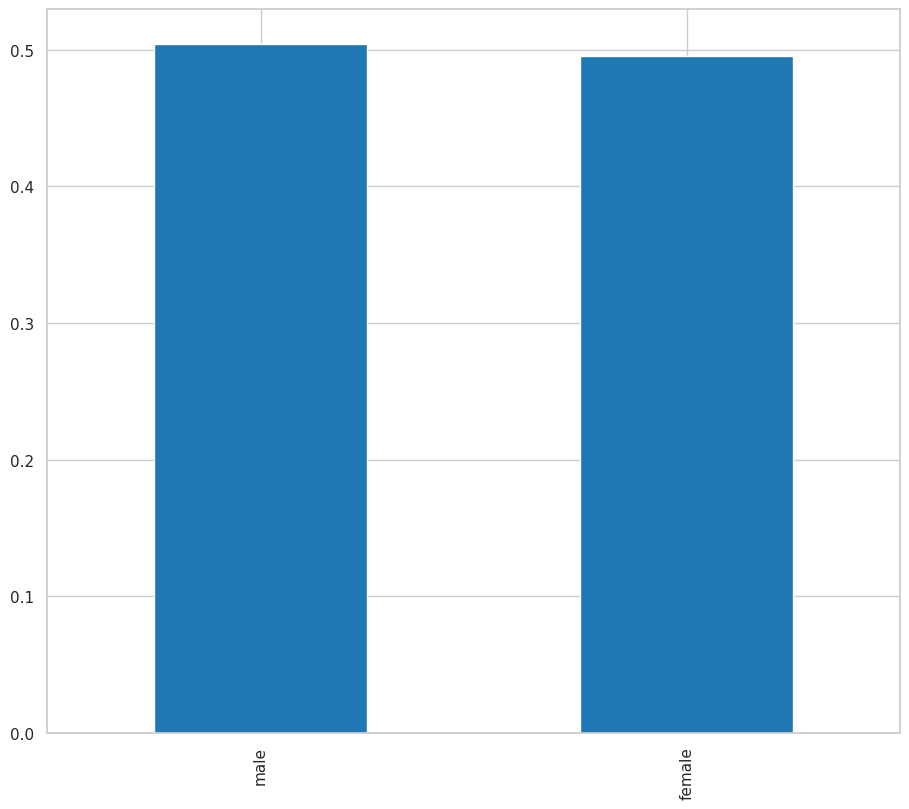

In [152]:
processed_penguins_df.sex.value_counts(normalize=True).plot(kind='bar')

Remplazamos la variable categórica por un 1 y 0

In [153]:
sex_numeric = processed_penguins_df.sex.replace(['male', 'female'], [1, 0])

In [154]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

/tmp/ipykernel_497/2724717292.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_497/2724717292.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_497/2724717292.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

Estimated percentage of male penguins in population is: 50.1829%


/tmp/ipykernel_497/2724717292.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_497/2724717292.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_497/2724717292.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

In [155]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sample_means_binomial

,sample_mean
sample_1,0.457143
sample_2,0.371429
sample_3,0.371429
sample_4,0.571429
sample_5,0.457143
...,...
sample_996,0.514286
sample_997,0.485714
sample_998,0.600000
sample_999,0.514286


In [164]:
stats = sample_means_binomial.sample_mean.describe()
stats

count    1000.000000
mean        0.501829
std         0.081456
min         0.285714
25%         0.457143
50%         0.514286
75%         0.542857
max         0.771429
Name: sample_mean, dtype: float64

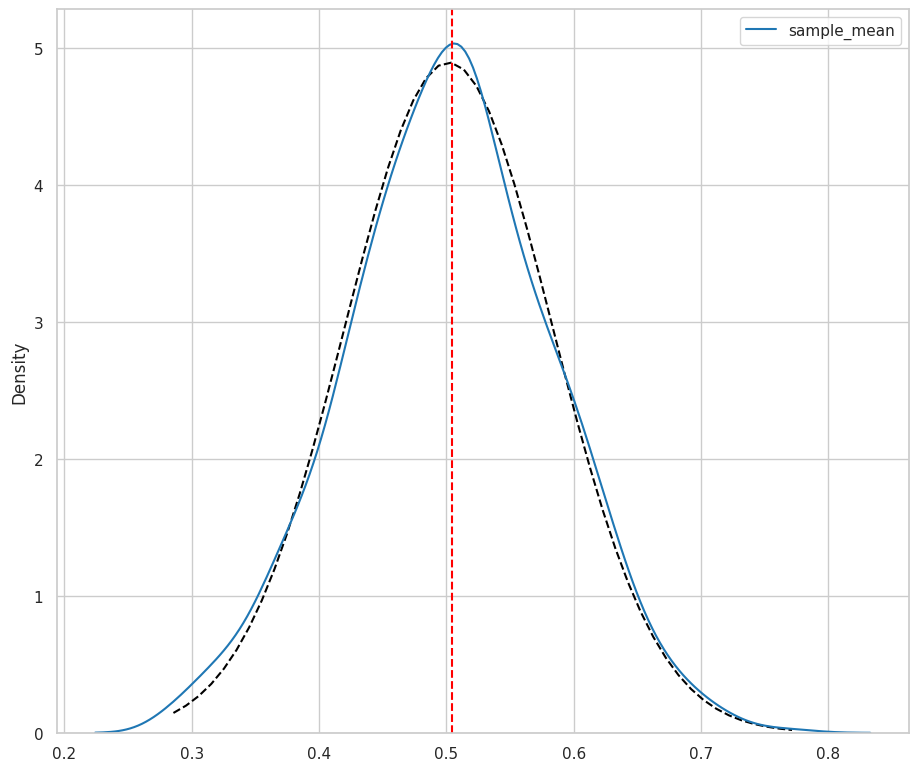

In [165]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [ ]:
sample_means_binomial

,sample_mean
sample_1,0.457143
sample_2,0.371429
sample_3,0.371429
sample_4,0.571429
sample_5,0.457143
...,...
sample_996,0.514286
sample_997,0.485714
sample_998,0.600000
sample_999,0.514286


In [ ]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

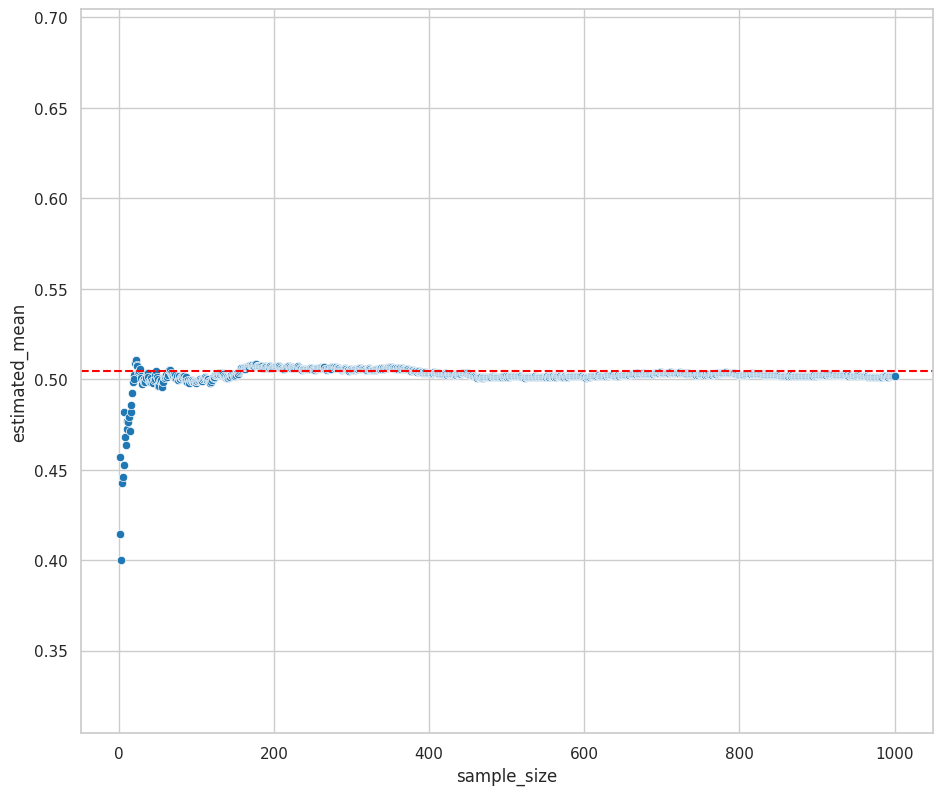

In [ ]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: Gráfica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

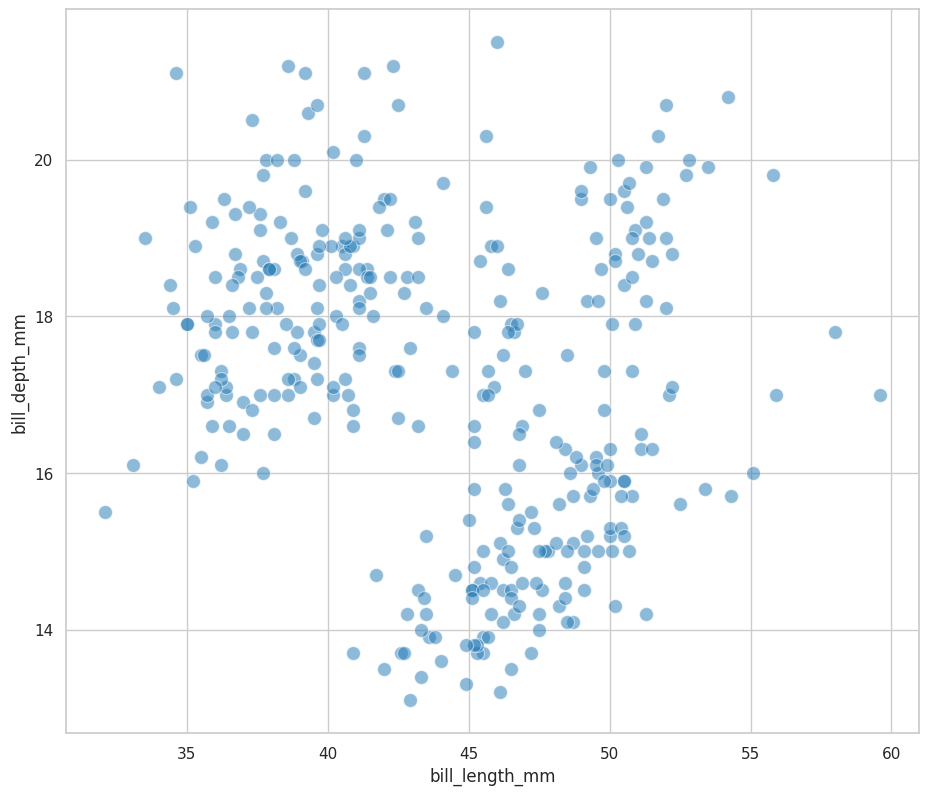

In [193]:
sns.scatterplot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    alpha = 1/2,
    s = 100)

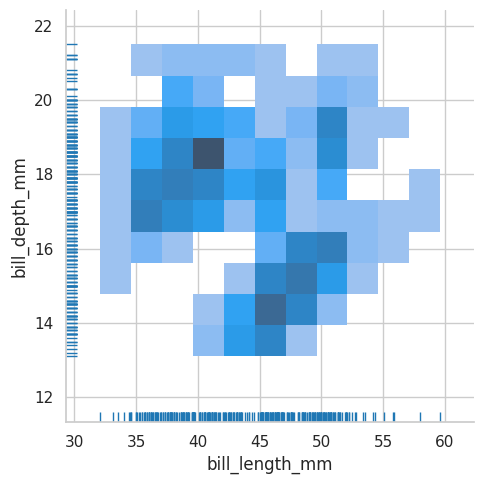

In [181]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

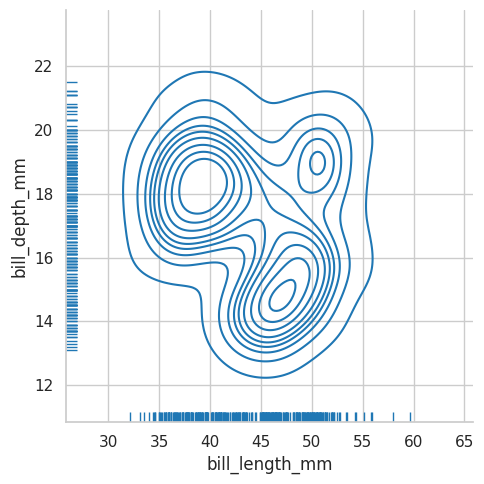

In [192]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde'
)

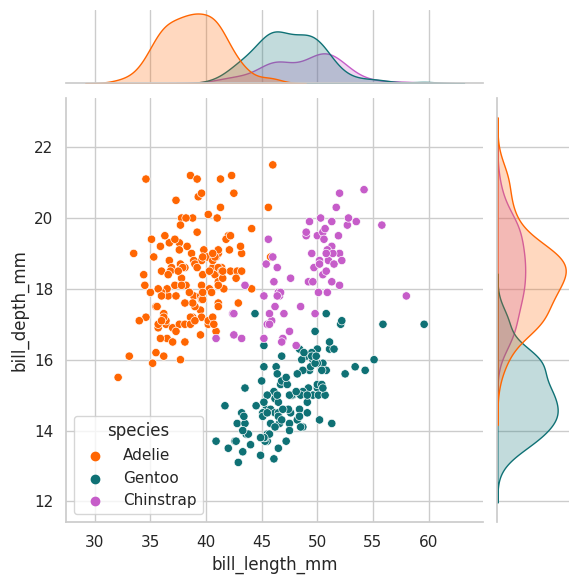

In [188]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    palette=penguin_color
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

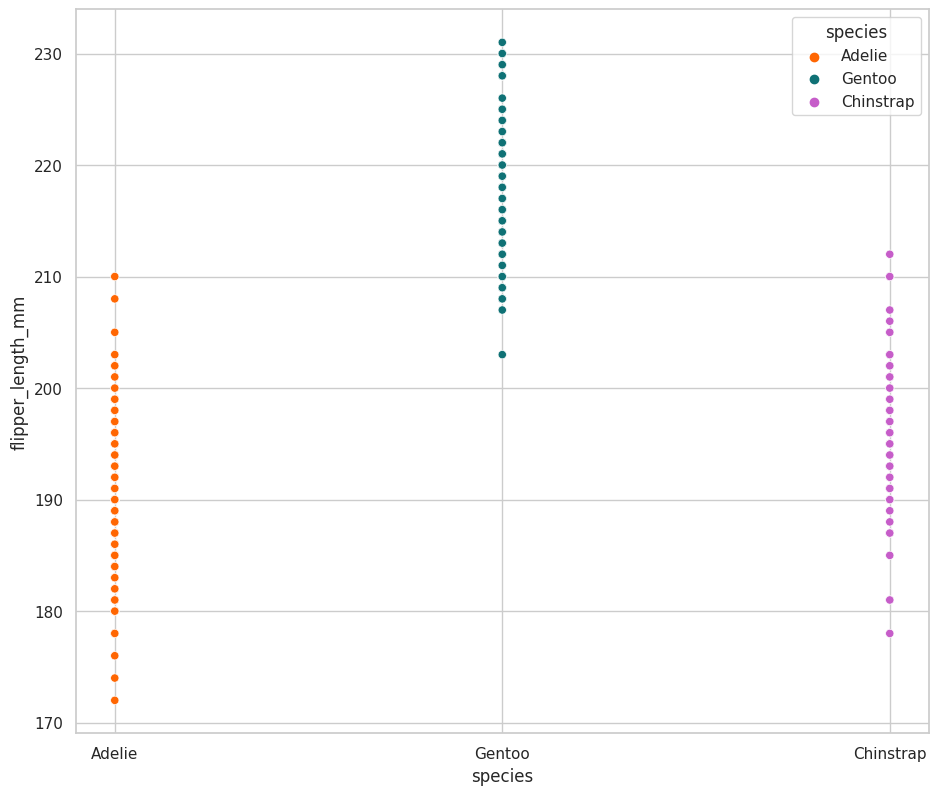

In [195]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

/tmp/ipykernel_497/826111948.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

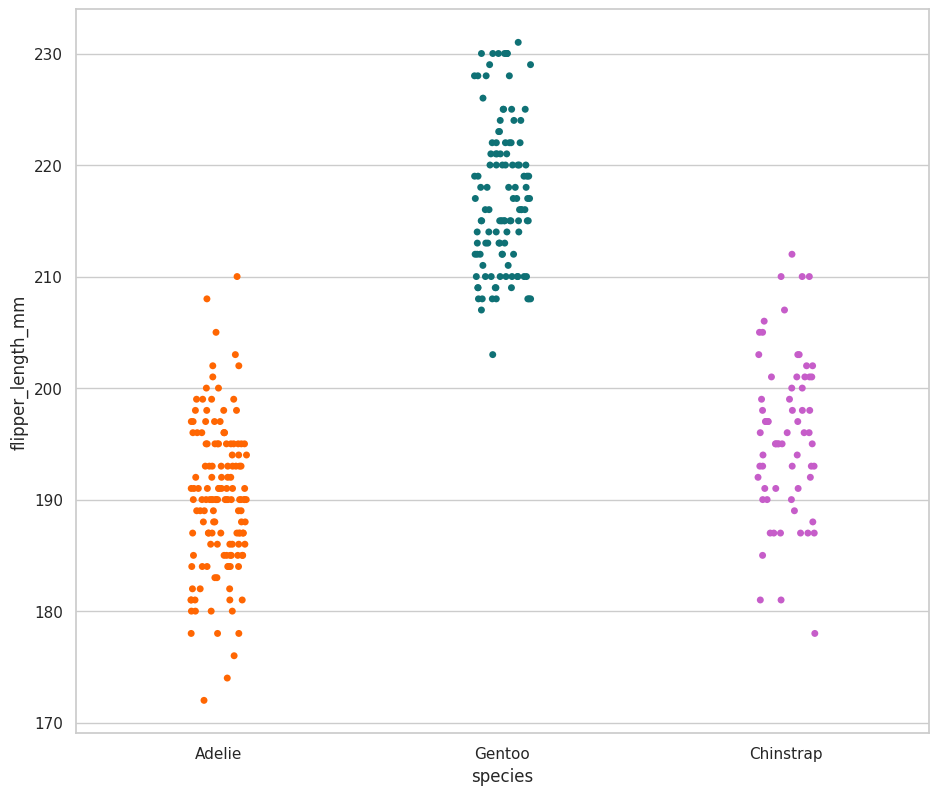

In [198]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

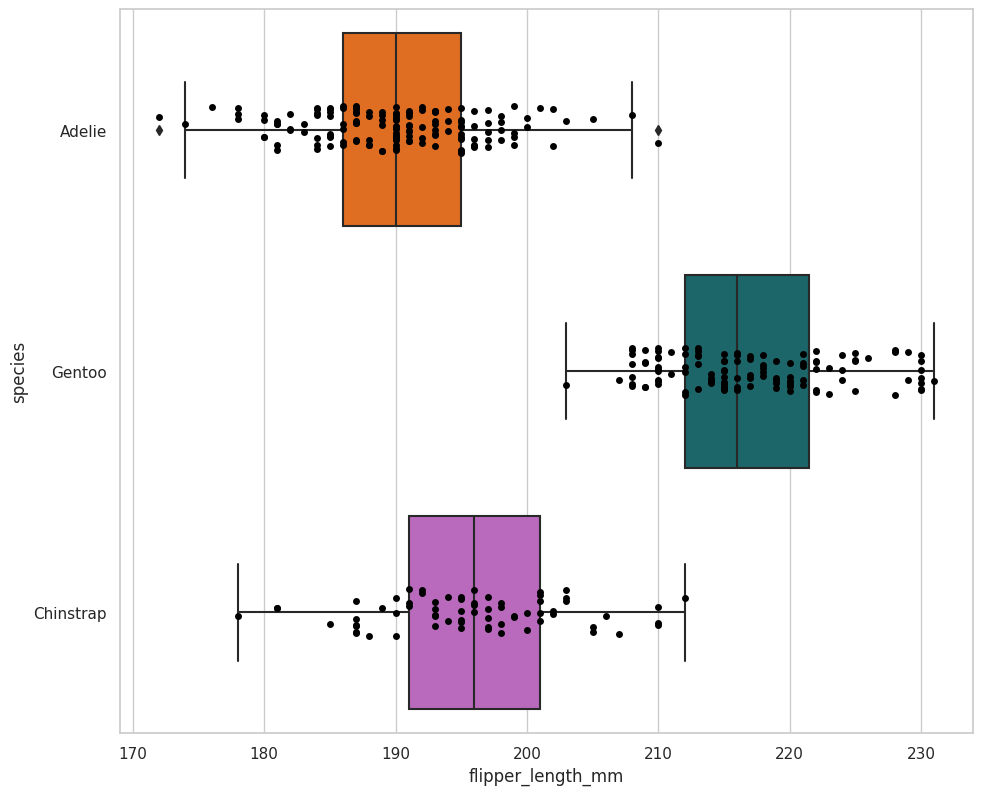

In [201]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='black'
)

/tmp/ipykernel_497/3852841415.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


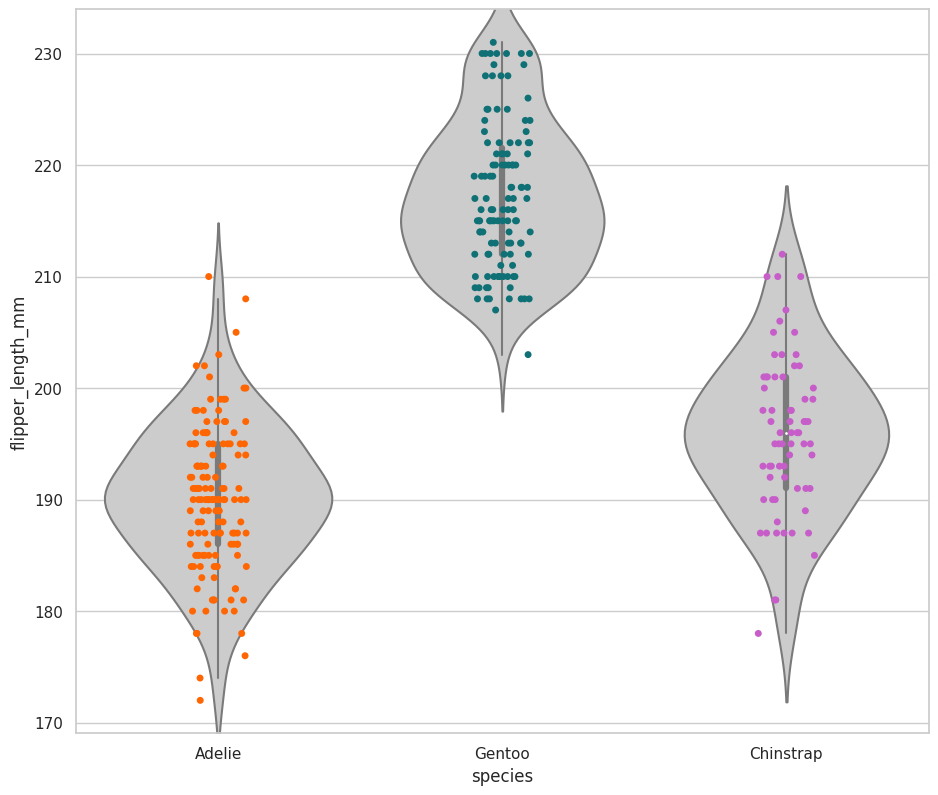

In [206]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x = 'species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x = 'species',
    y='flipper_length_mm',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

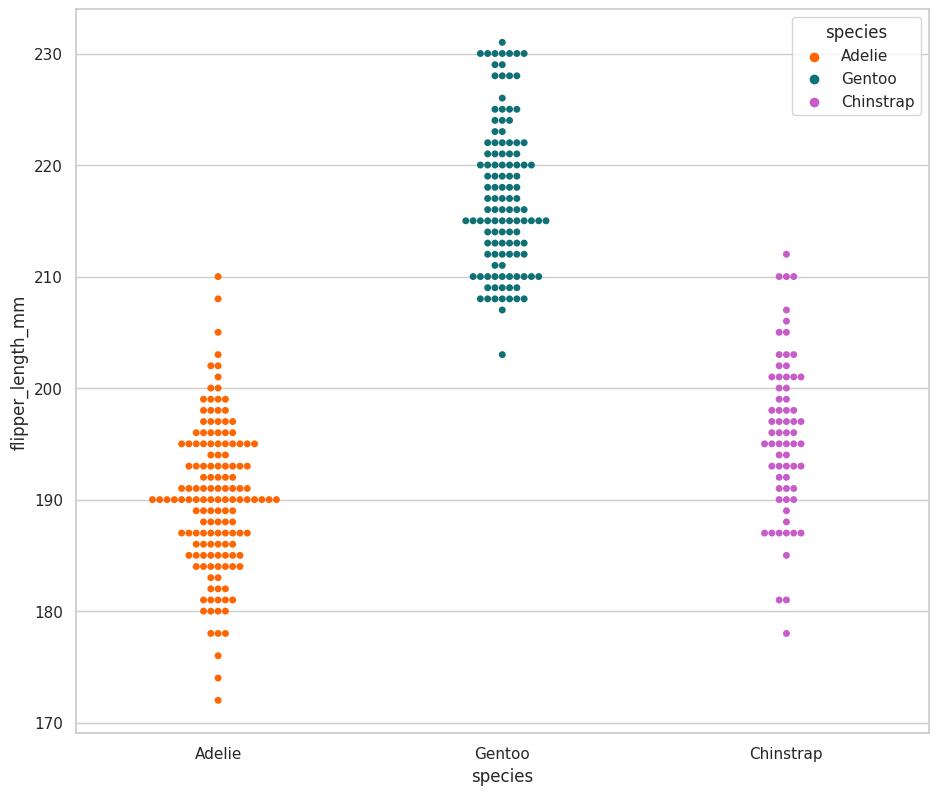

In [207]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue = 'species',
    palette = penguin_color
)

TODO: Estudiar el peso de los pinguinos por cada una de las islas

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

## ¿Cómo puedo visualizar los coeficientes de correlación?

## ¿Cómo podría representar una variable categórica como númerica discreta?

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

### El coeficiente de correlación no nos habla del impacto de la relación

# Estableciendo relaciones: Análisis de regresión simple

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

#### Modelo 2

#### Modelo 3

#### Modelo 4

#### Modelo 5

### Visualizando resultados

#### Creación de tabla de resultados

#### ECDFs

#### PDFs

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

## Exploración de nuestras variables categóricas

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

# Paradoja de Simpson

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=60375395-df7b-4578-bafc-836eeb64e810' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>